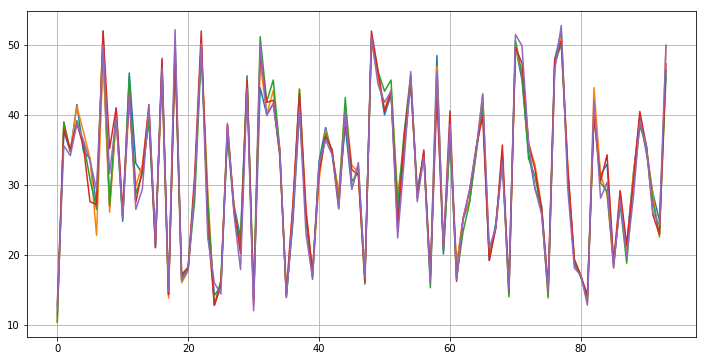

In [24]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sgtaxidata import *

DBNAME="../taxis.db"
DATE="20170627"
LOC="Sengkang"

lat,lon=utils.get_lat_long(LOC)

df=taxis.getdf_loc_date(DBNAME,DATE,lat,lon)

X=df.drop(['TaxiCount'],axis=1).as_matrix()
y=np.array(df['TaxiCount']).reshape(-1,1)

data=[]
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

    model = RandomForestRegressor()
    model.fit(X_train, y_train.ravel())
    data.append((range(len(X_test)),model.predict(X_test)))

visualize.plot_data(data)

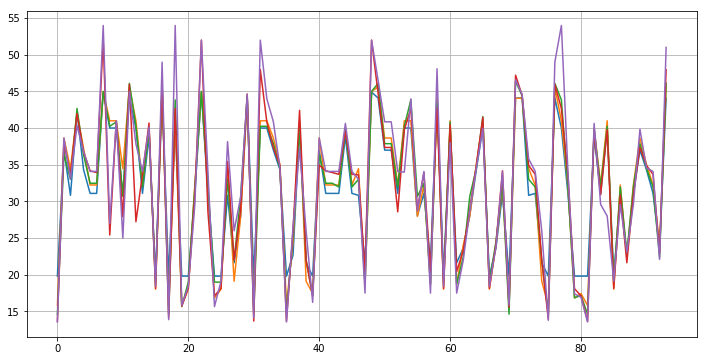

In [33]:
data1=[]
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

    model = GradientBoostingRegressor(n_estimators=100*(i+1), learning_rate=0.1*(i+1),max_depth=i+1, loss='lad').fit(X_train, y_train)
    model.fit(X_train, y_train.ravel())
    data1.append((range(len(X_test)),model.predict(X_test)))

visualize.plot_data(data1)